Defined 64 initial working channels from session 00.


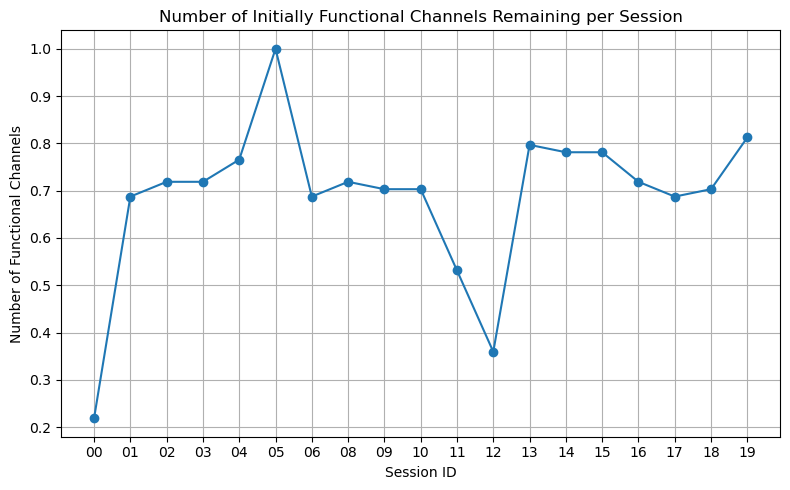

In [20]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define path
base_path = "/Users/eminhanozil/Yanik Lab Dropbox/Eminhan Özil/Localization Manuscript 2024/RAT DATA/rEO_06/impedances"

# Get all session files, sorted by session number
csv_files = sorted([f for f in os.listdir(base_path) if f.endswith('_impedance.csv')])

# Column of interest
impedance_column = "Impedance Magnitude at 1000 Hz (ohms)"

# Impedance bounds for functional channels
lower_bound = 1_000
upper_bound = 50_000_000
# Load session 00 and define functional (working) channels
session_0_file = os.path.join(base_path, '01_impedance.csv')
df_0 = pd.read_csv(session_0_file)

# Get indices of functional channels in session 00
initial_working_channels = df_0[
    (df_0[impedance_column] > lower_bound) & 
    (df_0[impedance_column] < upper_bound) & (df_0["Port"]=="Port A")
].index.tolist()

print(f"Defined {len(initial_working_channels)} initial working channels from session 00.")

# Dictionary to store count of functional channels per session
working_counts = {}

# Impedance bounds for functional channels
lower_bound = 75_000
upper_bound = 5_000_000

# Loop over all sessions and count how many of the initial channels remain within bounds
for file in csv_files:
    session_id = file[:2]
    df = pd.read_csv(os.path.join(base_path, file))
    
    if impedance_column in df.columns:
        values = df.loc[initial_working_channels, impedance_column]
        working_count = ((values > lower_bound) & (values < upper_bound)).sum()
        working_counts[session_id] = working_count
    else:
        print(f"Column '{impedance_column}' not found in {file}, skipping...")

# Plotting
session_ids = sorted(working_counts.keys())
counts = [working_counts[sid] for sid in session_ids]

plt.figure(figsize=(8, 5))
plt.plot(session_ids, np.array(counts)/len(initial_working_channels), marker='o')
plt.title("Number of Initially Functional Channels Remaining per Session")
plt.xlabel("Session ID")
plt.ylabel("Number of Functional Channels")
plt.grid(True)
plt.tight_layout()
plt.show()


In [19]:
np.array(counts)/len(initial_working_channels)

array([0.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.93181818, 0.95454545, 0.93181818, 0.93181818,
       0.65909091, 0.31818182, 0.95454545, 0.95454545, 0.95454545,
       0.84090909, 0.81818182, 0.84090909, 0.97727273])